In [22]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
#Import data
df=pd.read_csv('/content/drive/MyDrive/Tenx/Week 1/raw_analyst_ratings.csv',parse_dates=['date'])
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Descriptive Statistics

In [60]:
# Import EDA module
import eda
import importlib
importlib.reload(eda)

<module 'eda' from '/content/drive/MyDrive/Tenx/Week 1/eda.py'>

In [25]:
#headline length
df["char_length"]=df["headline"].astype(str).apply(len)
df["word_length"]=df["headline"].astype(str).apply(lambda x: len(x.split()))

print(df["char_length"].describe())
print(df["word_length"].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: char_length, dtype: float64
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: word_length, dtype: float64


Time Series Analysis

<ipython-input-61-437ddd0dd774>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stats=df.groupby(df["date"].dt.to_period("M")).size()


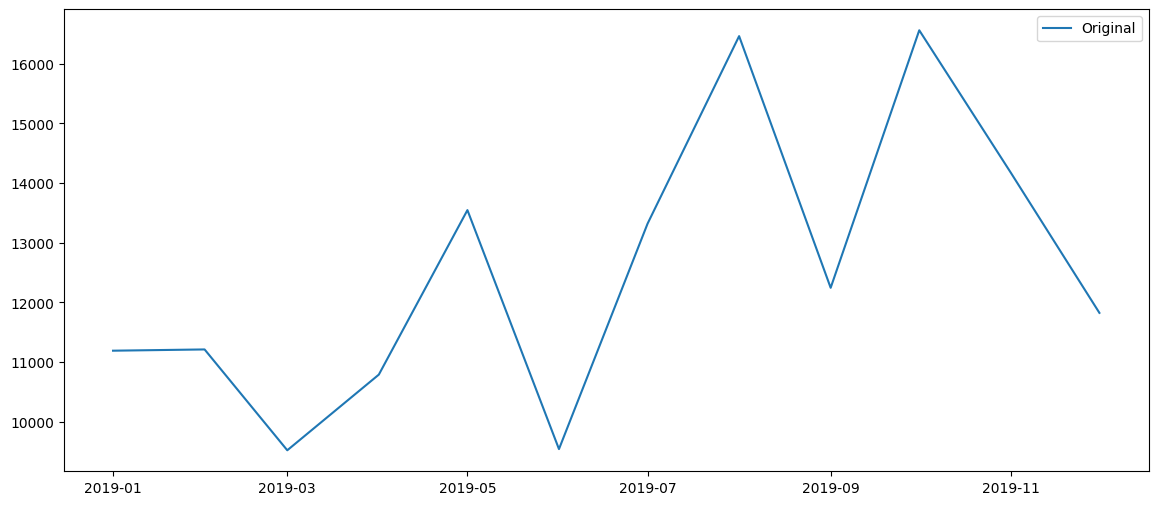

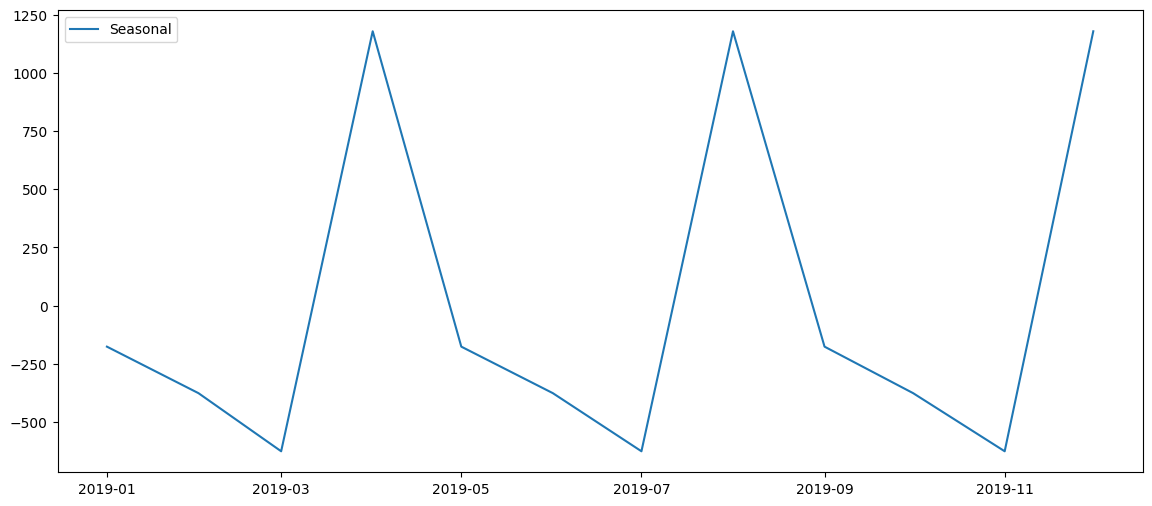

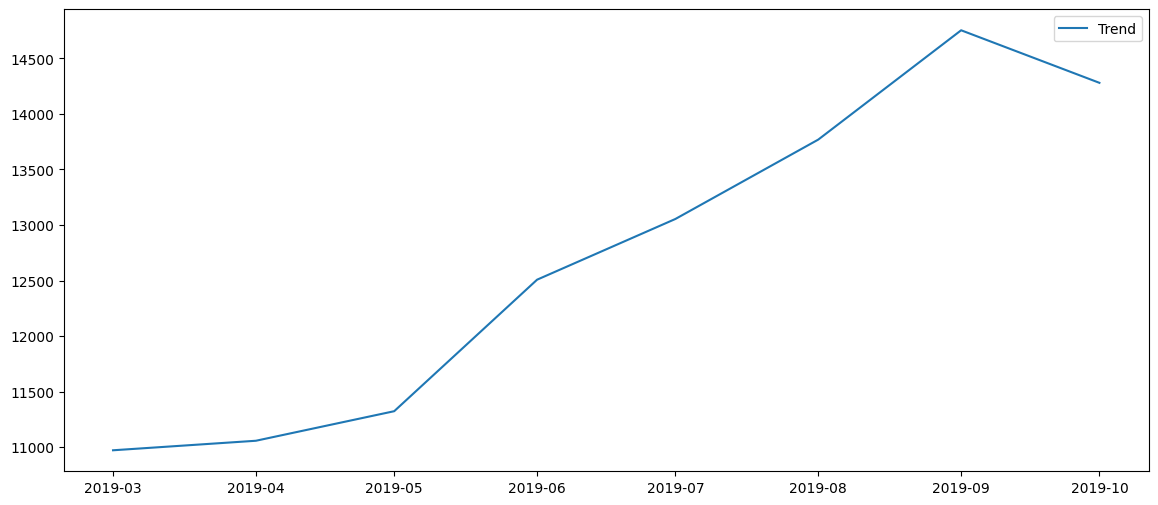

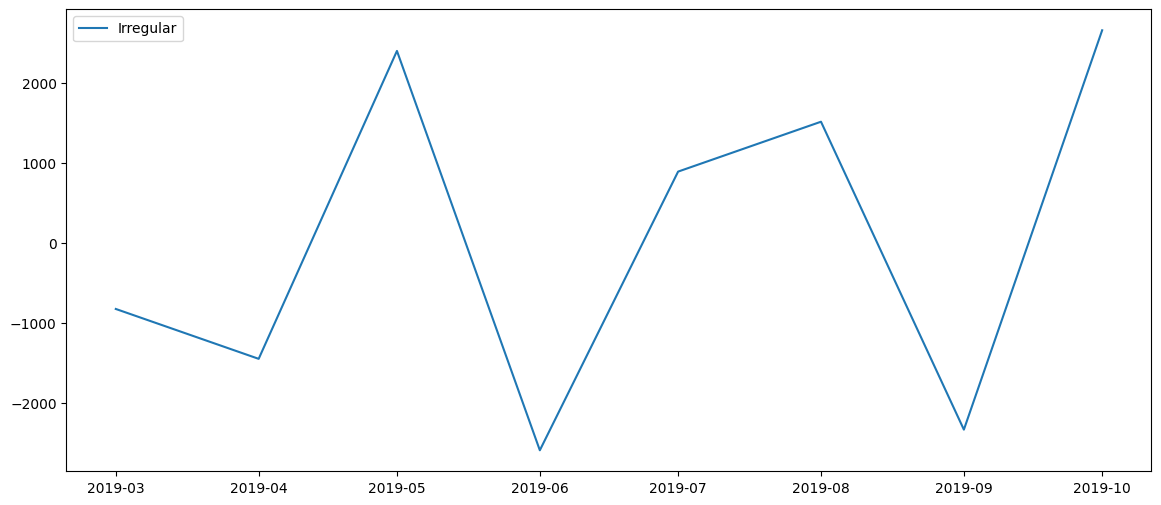

In [61]:
#trends over time
df["date"]=pd.to_datetime(df["date"],format='ISO8601')
stats=df.groupby(df["date"].dt.to_period("M")).size()
stats=stats.loc['2019-01':'2019-12']
stats.index = stats.index.to_timestamp()
tsd = pd.DataFrame({'Date': stats.index, 'Headlines': stats.values})
tsd.set_index('Date', inplace=True)

eda.decompose_data(tsd)


Publisher Analysis

In [27]:
#The number of articles per publisher
counts=eda.count_occur(df,"publisher")
print(counts)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
